## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pandas as pd
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print("✓ Libraries imported successfully!")
print("Neural Networks: Inspired by the human brain!")

✓ Libraries imported successfully!
Neural Networks: Inspired by the human brain!


## 2. Understanding Neural Networks

### What is a Neural Network?

A neural network is a system of interconnected **neurons** (nodes) organized in **layers**.

### Key Components:

1. **Input Layer**: Receives features (e.g., face image pixels)
2. **Hidden Layers**: Process information
3. **Output Layer**: Makes prediction
4. **Weights**: Connections between neurons
5. **Activation Function**: Adds non-linearity

### Biological Inspiration:

🧠 **Human Brain**: Billions of neurons connected by synapses  
🤖 **Artificial Network**: Mathematical model of neurons  

### How it Works:

```
Input → [Hidden Layer 1] → [Hidden Layer 2] → Output
         weights            weights           prediction
```

Each neuron:
1. Receives inputs
2. Multiplies by weights
3. Adds bias
4. Applies activation function
5. Passes to next layer

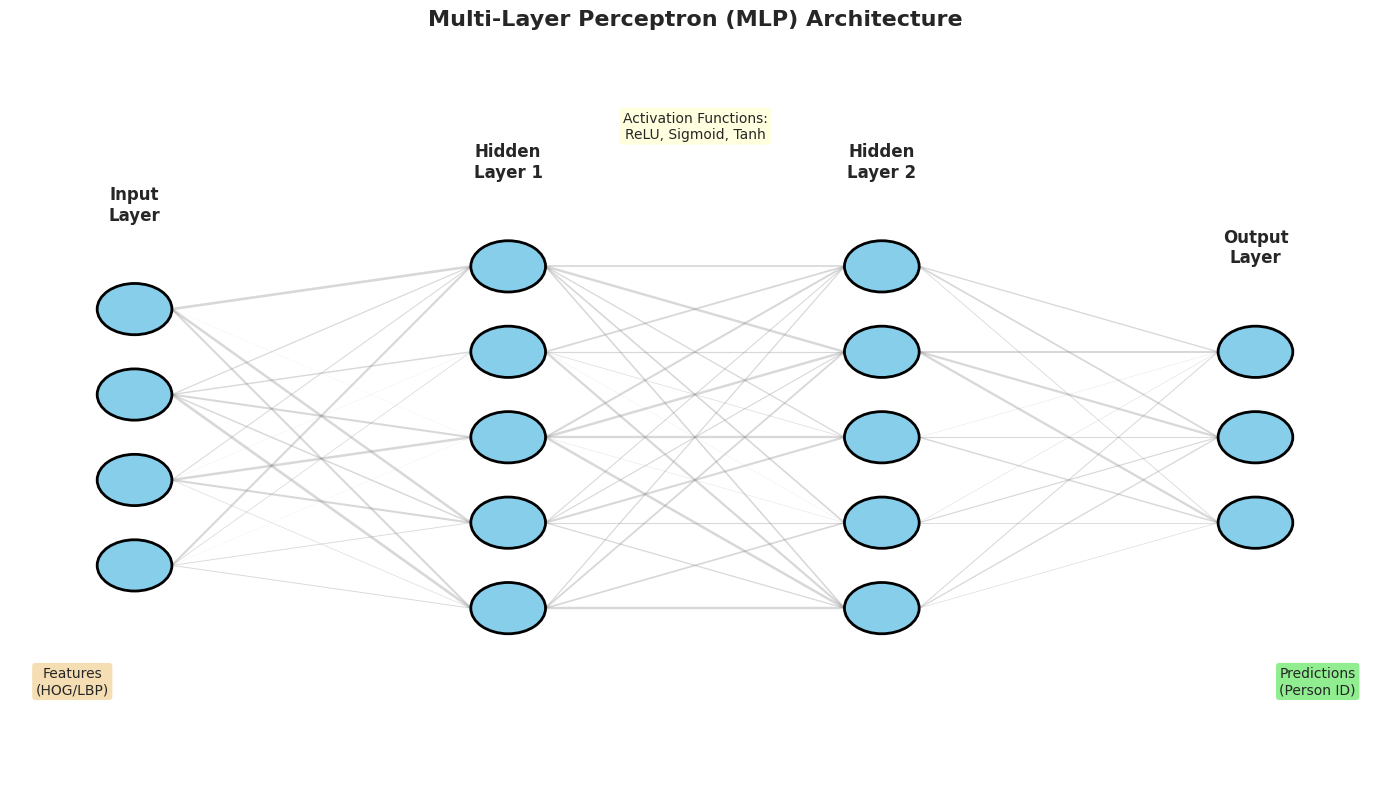

✓ Neural Network Architecture Visualized

Key Terms:
  • Input Layer: Receives features
  • Hidden Layers: Learn patterns
  • Output Layer: Makes predictions
  • Weights: Learned parameters
  • Activation: Non-linear transformation


In [2]:
# Visualize neural network architecture
def plot_neural_network():
    """Visualize a simple neural network"""
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Layer positions
    layers = [4, 5, 5, 3]  # neurons per layer
    layer_names = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayer 2', 'Output\nLayer']
    
    # Vertical positions for neurons
    v_spacing = 1.0
    h_spacing = 3.0
    
    # Draw neurons
    for layer_idx, n_neurons in enumerate(layers):
        x = layer_idx * h_spacing
        layer_top = (n_neurons - 1) * v_spacing / 2
        
        for neuron_idx in range(n_neurons):
            y = layer_top - neuron_idx * v_spacing
            
            # Draw circle
            circle = plt.Circle((x, y), 0.3, color='skyblue', 
                              ec='black', linewidth=2, zorder=4)
            ax.add_patch(circle)
            
            # Draw connections to next layer
            if layer_idx < len(layers) - 1:
                next_layer_top = (layers[layer_idx + 1] - 1) * v_spacing / 2
                for next_neuron_idx in range(layers[layer_idx + 1]):
                    next_y = next_layer_top - next_neuron_idx * v_spacing
                    next_x = (layer_idx + 1) * h_spacing
                    
                    # Draw line with varying thickness
                    weight = np.random.rand()
                    ax.plot([x + 0.3, next_x - 0.3], [y, next_y],
                           'gray', alpha=0.3, linewidth=weight*2, zorder=1)
        
        # Layer label
        label_y = layer_top + 1
        ax.text(x, label_y, layer_names[layer_idx],
               ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Add annotations
    ax.text(-0.5, -3, 'Features\n(HOG/LBP)', ha='center', fontsize=10, 
           bbox=dict(boxstyle='round', facecolor='wheat'))
    ax.text(h_spacing * 3 + 0.5, -3, 'Predictions\n(Person ID)', ha='center', 
           fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen'))
    
    # Activation function box
    ax.text(h_spacing * 1.5, 3.5, 'Activation Functions:\nReLU, Sigmoid, Tanh',
           ha='center', fontsize=10, 
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
    
    ax.set_xlim(-1, h_spacing * 3 + 1)
    ax.set_ylim(-4, 4.5)
    ax.axis('off')
    ax.set_title('Multi-Layer Perceptron (MLP) Architecture', 
                fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

plot_neural_network()

print("✓ Neural Network Architecture Visualized")
print("\nKey Terms:")
print("  • Input Layer: Receives features")
print("  • Hidden Layers: Learn patterns")
print("  • Output Layer: Makes predictions")
print("  • Weights: Learned parameters")
print("  • Activation: Non-linear transformation")

## 3. Activation Functions

### Why Activation Functions?

Without activation: Network = Linear model (limited)  
With activation: Network = Universal approximator (powerful!)

### Common Activations:

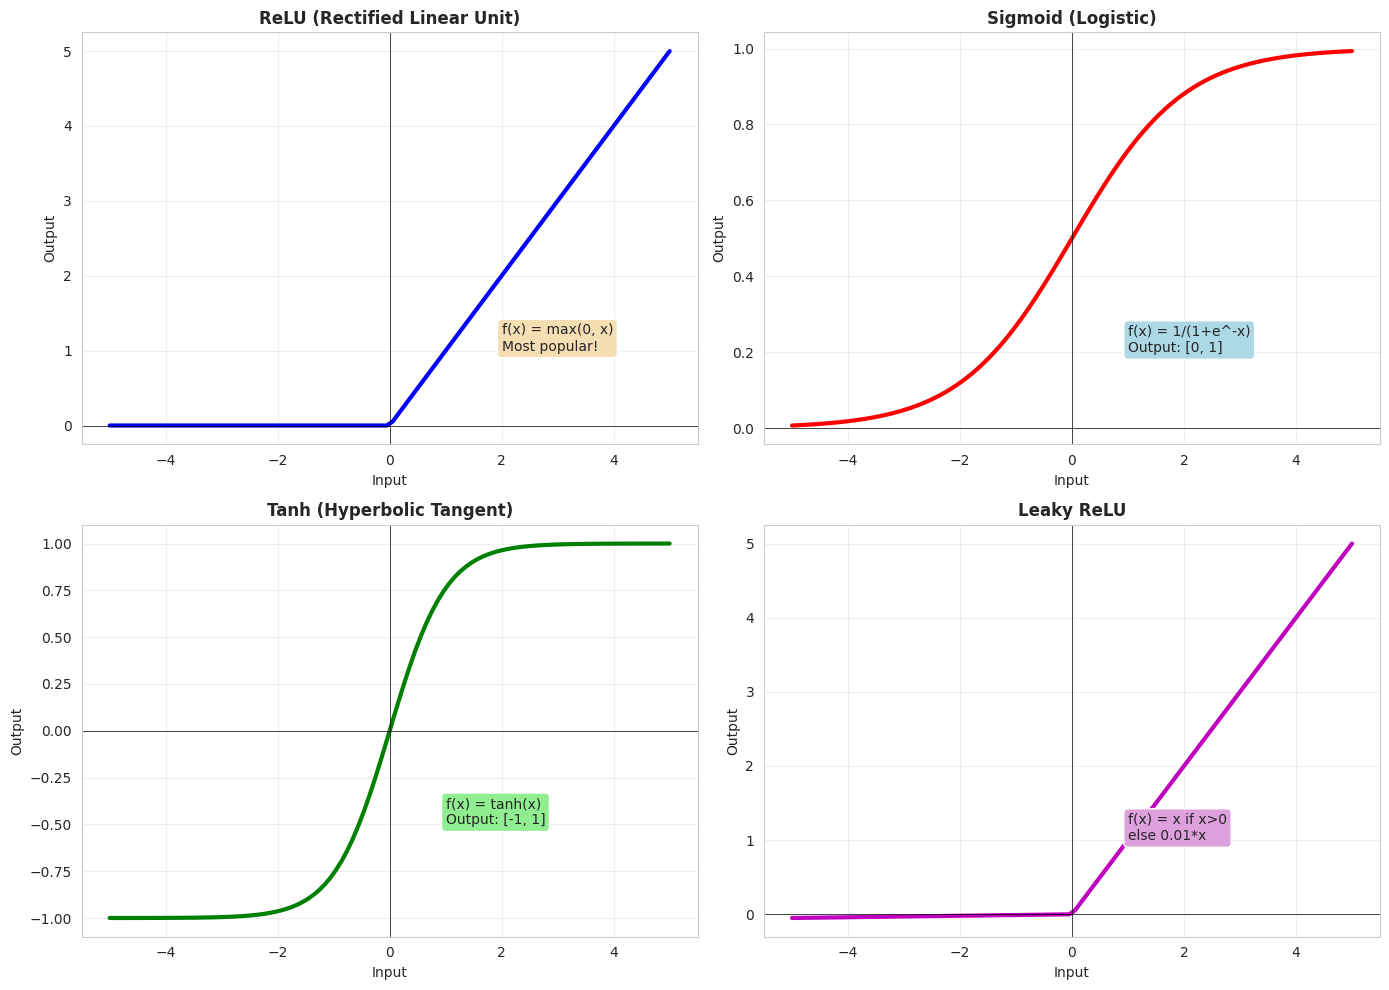

Activation Function Comparison:
ReLU:        Fast, popular, can 'die' (gradient=0)
Sigmoid:     Output [0,1], vanishing gradient problem
Tanh:        Output [-1,1], better than sigmoid
Leaky ReLU:  Fixes dying ReLU problem


In [3]:
# Visualize activation functions
def plot_activations():
    """Show common activation functions"""
    
    x = np.linspace(-5, 5, 100)
    
    # Define activations
    relu = np.maximum(0, x)
    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)
    leaky_relu = np.where(x > 0, x, 0.01 * x)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # ReLU
    axes[0, 0].plot(x, relu, 'b-', linewidth=3)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_title('ReLU (Rectified Linear Unit)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Input')
    axes[0, 0].set_ylabel('Output')
    axes[0, 0].axhline(0, color='black', linewidth=0.5)
    axes[0, 0].axvline(0, color='black', linewidth=0.5)
    axes[0, 0].text(2, 1, 'f(x) = max(0, x)\nMost popular!', 
                   bbox=dict(boxstyle='round', facecolor='wheat'))
    
    # Sigmoid
    axes[0, 1].plot(x, sigmoid, 'r-', linewidth=3)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_title('Sigmoid (Logistic)', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Input')
    axes[0, 1].set_ylabel('Output')
    axes[0, 1].axhline(0, color='black', linewidth=0.5)
    axes[0, 1].axvline(0, color='black', linewidth=0.5)
    axes[0, 1].text(1, 0.2, 'f(x) = 1/(1+e^-x)\nOutput: [0, 1]', 
                   bbox=dict(boxstyle='round', facecolor='lightblue'))
    
    # Tanh
    axes[1, 0].plot(x, tanh, 'g-', linewidth=3)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_title('Tanh (Hyperbolic Tangent)', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Input')
    axes[1, 0].set_ylabel('Output')
    axes[1, 0].axhline(0, color='black', linewidth=0.5)
    axes[1, 0].axvline(0, color='black', linewidth=0.5)
    axes[1, 0].text(1, -0.5, 'f(x) = tanh(x)\nOutput: [-1, 1]', 
                   bbox=dict(boxstyle='round', facecolor='lightgreen'))
    
    # Leaky ReLU
    axes[1, 1].plot(x, leaky_relu, 'm-', linewidth=3)
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_title('Leaky ReLU', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Input')
    axes[1, 1].set_ylabel('Output')
    axes[1, 1].axhline(0, color='black', linewidth=0.5)
    axes[1, 1].axvline(0, color='black', linewidth=0.5)
    axes[1, 1].text(1, 1, 'f(x) = x if x>0\nelse 0.01*x', 
                   bbox=dict(boxstyle='round', facecolor='plum'))
    
    plt.tight_layout()
    plt.show()
    
    print("Activation Function Comparison:")
    print("="*60)
    print("ReLU:        Fast, popular, can 'die' (gradient=0)")
    print("Sigmoid:     Output [0,1], vanishing gradient problem")
    print("Tanh:        Output [-1,1], better than sigmoid")
    print("Leaky ReLU:  Fixes dying ReLU problem")

plot_activations()

## 4. Prepare Face Recognition Dataset

In [4]:
# Create synthetic face recognition dataset
X, y = make_classification(
    n_samples=600,
    n_features=50,
    n_informative=40,
    n_redundant=5,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale features (IMPORTANT for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset prepared:")
print(f"  Training samples: {len(X_train_scaled)}")
print(f"  Test samples: {len(X_test_scaled)}")
print(f"  Features: {X_train_scaled.shape[1]}")
print(f"  Classes: {len(np.unique(y))}")
print(f"\n✓ Features scaled to mean=0, std=1 (required for neural networks)")

Dataset prepared:
  Training samples: 450
  Test samples: 150
  Features: 50
  Classes: 3

✓ Features scaled to mean=0, std=1 (required for neural networks)


## 5. Train Neural Network

In [5]:
# Create and train MLP
print("Training Multi-Layer Perceptron...\n")

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
    activation='relu',              # ReLU activation
    solver='adam',                  # Adam optimizer (adaptive learning rate)
    alpha=0.0001,                   # L2 regularization
    batch_size=32,                  # Mini-batch size
    learning_rate='adaptive',       # Adaptive learning rate
    max_iter=500,                   # Maximum epochs
    random_state=42,
    verbose=False
)

# Train
start_time = time.time()
mlp.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Evaluate
train_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)

print(f"Training completed in {train_time:.2f} seconds")
print(f"Iterations: {mlp.n_iter_}")
print(f"\nTraining Accuracy: {train_score:.4f}")
print(f"Test Accuracy:     {test_score:.4f}")

# Predictions
y_pred = mlp.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Person A', 'Person B', 'Person C']))

# Network architecture
print("\nNetwork Architecture:")
print(f"  Input layer:    {X_train_scaled.shape[1]} neurons")
for i, size in enumerate(mlp.hidden_layer_sizes):
    print(f"  Hidden layer {i+1}: {size} neurons")
print(f"  Output layer:   {len(np.unique(y))} neurons")
print(f"  Total parameters: {sum([w.size for w in mlp.coefs_])}")

Training Multi-Layer Perceptron...

Training completed in 0.23 seconds
Iterations: 75

Training Accuracy: 1.0000
Test Accuracy:     0.7933

Classification Report:
              precision    recall  f1-score   support

    Person A       0.79      0.84      0.82        50
    Person B       0.76      0.76      0.76        49
    Person C       0.83      0.78      0.81        51

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150


Network Architecture:
  Input layer:    50 neurons
  Hidden layer 1: 100 neurons
  Hidden layer 2: 50 neurons
  Output layer:   3 neurons
  Total parameters: 10150


## 6. Training Loss Curve

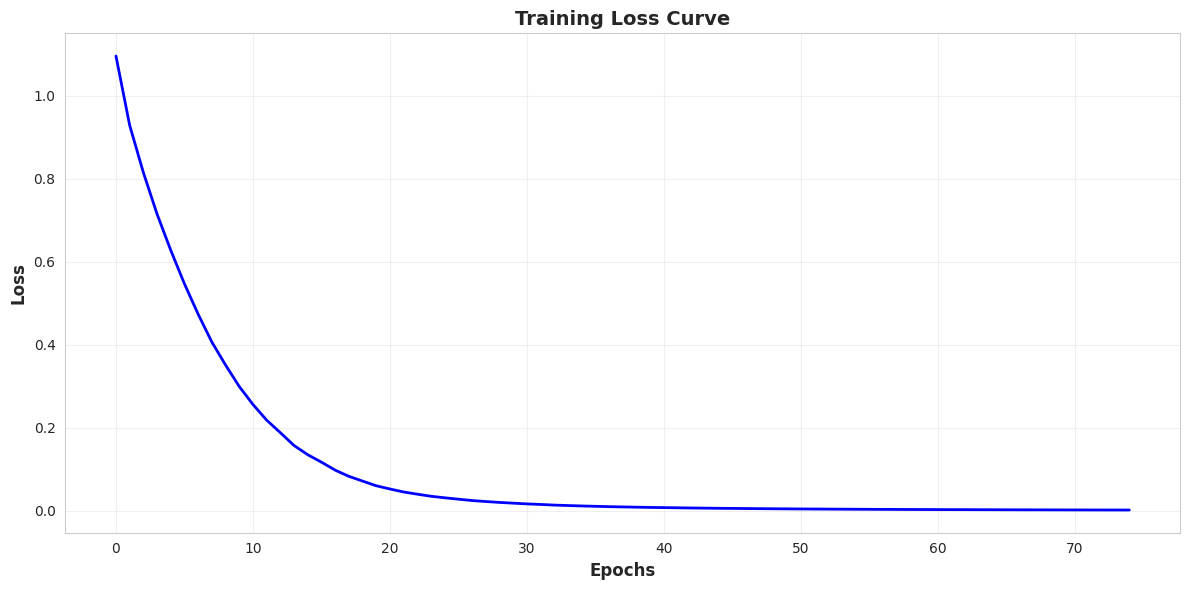

Final Loss: 0.0019
Initial Loss: 1.0957
Loss Reduction: 1.0938


In [6]:
# Plot loss curve
plt.figure(figsize=(12, 6))
plt.plot(mlp.loss_curve_, linewidth=2, color='blue')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Training Loss Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Initial Loss: {mlp.loss_curve_[0]:.4f}")
print(f"Loss Reduction: {mlp.loss_curve_[0] - mlp.loss_curve_[-1]:.4f}")

## 7. Effect of Hidden Layer Size

In [7]:
# Test different architectures
architectures = [
    (50,),           # 1 hidden layer, 50 neurons
    (100,),          # 1 hidden layer, 100 neurons
    (50, 50),        # 2 hidden layers, 50 each
    (100, 50),       # 2 hidden layers, 100 and 50
    (100, 100),      # 2 hidden layers, 100 each
    (100, 50, 25),   # 3 hidden layers
]

results = []

print("Testing different architectures...")
print("="*70)

for arch in architectures:
    mlp_temp = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        max_iter=300,
        random_state=42,
        verbose=False
    )
    
    mlp_temp.fit(X_train_scaled, y_train)
    
    train_acc = mlp_temp.score(X_train_scaled, y_train)
    test_acc = mlp_temp.score(X_test_scaled, y_test)
    n_params = sum([w.size for w in mlp_temp.coefs_])
    
    arch_str = '-'.join(map(str, arch))
    print(f"{arch_str:15s} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | Params: {n_params:6d}")
    
    results.append({
        'Architecture': arch_str,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Parameters': n_params
    })

# Find best architecture
best_idx = np.argmax([r['Test Acc'] for r in results])
print("\n" + "="*70)
print(f"Best Architecture: {results[best_idx]['Architecture']}")
print(f"Best Test Accuracy: {results[best_idx]['Test Acc']:.4f}")

Testing different architectures...
50              | Train: 1.0000 | Test: 0.8067 | Params:   2650


/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


100             | Train: 1.0000 | Test: 0.8200 | Params:   5300
50-50           | Train: 1.0000 | Test: 0.8067 | Params:   5150
100-50          | Train: 1.0000 | Test: 0.8133 | Params:  10150
100-100         | Train: 1.0000 | Test: 0.8000 | Params:  15300
100-50-25       | Train: 1.0000 | Test: 0.7800 | Params:  11325

Best Architecture: 100
Best Test Accuracy: 0.8200


## 8. Comparing All Algorithms

Comparing all algorithms on face recognition...
SVM             | Train: 0.0128s | Pred: 0.0038s | Acc: 0.8400
KNN             | Train: 0.0006s | Pred: 0.0319s | Acc: 0.7800
Random Forest   | Train: 0.1713s | Pred: 0.0024s | Acc: 0.6933
Neural Network  | Train: 0.1560s | Pred: 0.0003s | Acc: 0.8133


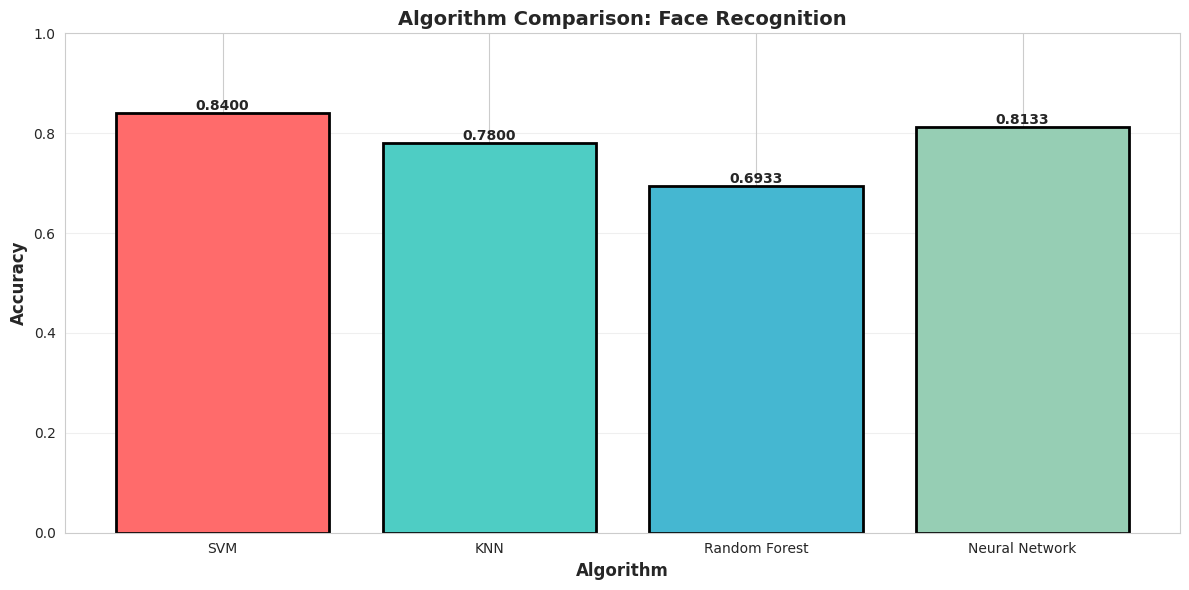


     Algorithm Train Time (s) Pred Time (s) Accuracy  Accuracy_float
           SVM         0.0128        0.0038   0.8400          0.8400
           KNN         0.0006        0.0319   0.7800          0.7800
 Random Forest         0.1713        0.0024   0.6933          0.6933
Neural Network         0.1560        0.0003   0.8133          0.8133


In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

print("Comparing all algorithms on face recognition...")
print("="*80)

algorithms = [
    ('SVM', SVC(kernel='rbf', random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, 
                                     random_state=42, verbose=False))
]

comparison_results = []

for name, model in algorithms:
    # Use scaled data for SVM, KNN, and Neural Network
    X_tr = X_train_scaled if name != 'Random Forest' else X_train
    X_te = X_test_scaled if name != 'Random Forest' else X_test
    
    # Train
    start = time.time()
    model.fit(X_tr, y_train)
    train_time = time.time() - start
    
    # Predict
    start = time.time()
    y_pred = model.predict(X_te)
    pred_time = time.time() - start
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    
    comparison_results.append({
        'Algorithm': name,
        'Train Time (s)': f'{train_time:.4f}',
        'Pred Time (s)': f'{pred_time:.4f}',
        'Accuracy': f'{accuracy:.4f}'
    })
    
    print(f"{name:15s} | Train: {train_time:.4f}s | Pred: {pred_time:.4f}s | Acc: {accuracy:.4f}")

print("="*80)

# Visualization
df = pd.DataFrame(comparison_results)
df['Accuracy_float'] = df['Accuracy'].astype(float)

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(df['Algorithm'], df['Accuracy_float'], color=colors, 
              edgecolor='black', linewidth=2)

plt.xlabel('Algorithm', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Algorithm Comparison: Face Recognition', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + df.to_string(index=False))

## 9. Algorithm Characteristics Summary

In [9]:
# Create comprehensive comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['SVM', 'KNN', 'Random Forest', 'Neural Network'],
    'Scaling Required': ['Yes', 'Yes', 'No', 'Yes'],
    'Training Speed': ['Slow', 'Instant', 'Medium', 'Slow'],
    'Prediction Speed': ['Fast', 'Slow', 'Fast', 'Fast'],
    'Interpretability': ['Low', 'High', 'Medium', 'Very Low'],
    'Handles Non-linear': ['Good', 'Good', 'Excellent', 'Excellent'],
    'Feature Importance': ['No', 'No', 'Yes', 'Limited'],
    'Best For': ['High-dim data', 'Small datasets', 'Robust baseline', 'Complex patterns']
})

print("\nCOMPREHENSIVE ALGORITHM COMPARISON:")
print("="*80)
print(comparison_table.to_string(index=False))

print("\n" + "="*80)
print("ALGORITHM SELECTION GUIDE:")
print("="*80)
print("\n📊 SVM (Support Vector Machine):")
print("  ✓ When: Need high accuracy, fast prediction")
print("  ✓ Works well: High-dimensional data")
print("  ✗ Avoid: Large datasets (slow training)")

print("\n🔍 KNN (K-Nearest Neighbors):")
print("  ✓ When: Small dataset, need simplicity")
print("  ✓ Works well: Low dimensions, clear clusters")
print("  ✗ Avoid: Large datasets (slow prediction)")

print("\n🌲 Random Forest:")
print("  ✓ When: Need feature importance, robustness")
print("  ✓ Works well: Mixed features, no scaling needed")
print("  ✗ Avoid: Need fast training on very large data")

print("\n🧠 Neural Network:")
print("  ✓ When: Large dataset, complex patterns")
print("  ✓ Works well: High-dimensional, non-linear")
print("  ✗ Avoid: Small dataset, need interpretability")

print("\n" + "="*80)
print("RECOMMENDATION FOR FACE RECOGNITION:")
print("="*80)
print("• Small dataset (<1000): SVM or Random Forest")
print("• Medium dataset (1000-10k): SVM or Neural Network")
print("• Large dataset (>10k): Neural Network")
print("• Need interpretability: Random Forest")
print("• Need speed: SVM (prediction) or KNN (training)")


COMPREHENSIVE ALGORITHM COMPARISON:
     Algorithm Scaling Required Training Speed Prediction Speed Interpretability Handles Non-linear Feature Importance         Best For
           SVM              Yes           Slow             Fast              Low               Good                 No    High-dim data
           KNN              Yes        Instant             Slow             High               Good                 No   Small datasets
 Random Forest               No         Medium             Fast           Medium          Excellent                Yes  Robust baseline
Neural Network              Yes           Slow             Fast         Very Low          Excellent            Limited Complex patterns

ALGORITHM SELECTION GUIDE:

📊 SVM (Support Vector Machine):
  ✓ When: Need high accuracy, fast prediction
  ✓ Works well: High-dimensional data
  ✗ Avoid: Large datasets (slow training)

🔍 KNN (K-Nearest Neighbors):
  ✓ When: Small dataset, need simplicity
  ✓ Works well: Low dimen

## 10. Overfitting and Regularization

In [10]:
# Demonstrate overfitting
print("Demonstrating overfitting with different regularization...")
print("="*70)

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]

for alpha in alpha_values:
    mlp_temp = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        alpha=alpha,  # Regularization strength
        max_iter=300,
        random_state=42,
        verbose=False
    )
    
    mlp_temp.fit(X_train_scaled, y_train)
    
    train_acc = mlp_temp.score(X_train_scaled, y_train)
    test_acc = mlp_temp.score(X_test_scaled, y_test)
    gap = train_acc - test_acc
    
    print(f"Alpha={alpha:7.5f} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | Gap: {gap:.4f}")

print("\nObservation:")
print("  • Low alpha: High train accuracy, lower test (overfitting)")
print("  • High alpha: Lower train, higher test (better generalization)")
print("  • Sweet spot: Balance between train and test accuracy")

Demonstrating overfitting with different regularization...
Alpha=0.00001 | Train: 1.0000 | Test: 0.8133 | Gap: 0.1867
Alpha=0.00010 | Train: 1.0000 | Test: 0.8133 | Gap: 0.1867
Alpha=0.00100 | Train: 1.0000 | Test: 0.8133 | Gap: 0.1867
Alpha=0.01000 | Train: 1.0000 | Test: 0.8133 | Gap: 0.1867
Alpha=0.10000 | Train: 1.0000 | Test: 0.8267 | Gap: 0.1733

Observation:
  • Low alpha: High train accuracy, lower test (overfitting)
  • High alpha: Lower train, higher test (better generalization)
  • Sweet spot: Balance between train and test accuracy


## 11. Complete Neural Network Pipeline

✓ Neural Network trained
  Architecture: 50 → 100 → 50 → 3
  Total parameters: 10150
  Iterations: 127
  Final loss: 0.0037

Model Evaluation:
  Accuracy: 0.8133

Classification Report:
              precision    recall  f1-score   support

       Alice       0.81      0.84      0.82        50
         Bob       0.76      0.80      0.78        49
     Charlie       0.87      0.80      0.84        51

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.82      0.81      0.81       150



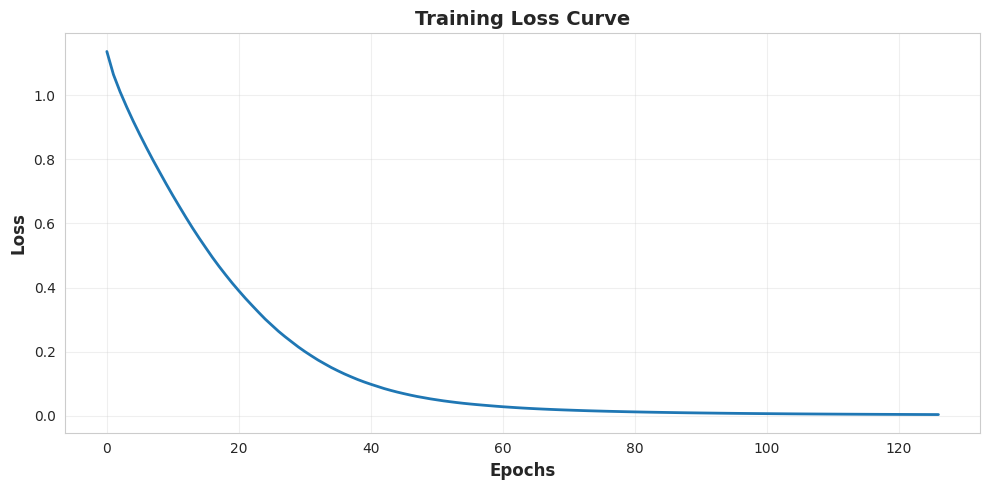


Sample predictions with confidence:
  Sample 1: Charlie (confidence: 0.5259)
  Sample 2: Charlie (confidence: 0.9987)
  Sample 3: Alice (confidence: 0.9933)
  Sample 4: Alice (confidence: 0.9910)
  Sample 5: Bob (confidence: 0.9844)


In [11]:
class NeuralNetworkFaceRecognizer:
    """Complete Neural Network Face Recognition Pipeline"""
    
    def __init__(self, hidden_layers=(100, 50), activation='relu', alpha=0.0001):
        self.scaler = StandardScaler()
        self.mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layers,
            activation=activation,
            alpha=alpha,
            max_iter=500,
            random_state=42,
            verbose=False
        )
        self.label_names = {}
        
    def train(self, X_train, y_train, label_names=None):
        """Train the neural network"""
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        
        # Train model
        self.mlp.fit(X_train_scaled, y_train)
        
        # Store label names
        if label_names:
            self.label_names = label_names
        else:
            self.label_names = {i: f"Person {i}" for i in np.unique(y_train)}
        
        print(f"✓ Neural Network trained")
        print(f"  Architecture: {X_train.shape[1]} → {' → '.join(map(str, self.mlp.hidden_layer_sizes))} → {len(self.label_names)}")
        print(f"  Total parameters: {sum([w.size for w in self.mlp.coefs_])}")
        print(f"  Iterations: {self.mlp.n_iter_}")
        print(f"  Final loss: {self.mlp.loss_curve_[-1]:.4f}")
        
    def predict(self, X_test, return_confidence=False):
        """Predict labels for test data"""
        X_test_scaled = self.scaler.transform(X_test)
        predictions = self.mlp.predict(X_test_scaled)
        
        if return_confidence:
            probabilities = self.mlp.predict_proba(X_test_scaled)
            confidence = np.max(probabilities, axis=1)
            return predictions, confidence
        
        return predictions
    
    def evaluate(self, X_test, y_test):
        """Evaluate model"""
        predictions = self.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        print(f"\nModel Evaluation:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"\nClassification Report:")
        print(classification_report(y_test, predictions,
                                   target_names=list(self.label_names.values())))
        
        return accuracy
    
    def plot_training_loss(self):
        """Plot training loss curve"""
        plt.figure(figsize=(10, 5))
        plt.plot(self.mlp.loss_curve_, linewidth=2)
        plt.xlabel('Epochs', fontsize=12, fontweight='bold')
        plt.ylabel('Loss', fontsize=12, fontweight='bold')
        plt.title('Training Loss Curve', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Test the complete pipeline
recognizer = NeuralNetworkFaceRecognizer(hidden_layers=(100, 50))
label_names = {0: "Alice", 1: "Bob", 2: "Charlie"}
recognizer.train(X_train, y_train, label_names)
recognizer.evaluate(X_test, y_test)
recognizer.plot_training_loss()

# Test with confidence
predictions, confidence = recognizer.predict(X_test[:5], return_confidence=True)
print(f"\nSample predictions with confidence:")
for i, (pred, conf) in enumerate(zip(predictions, confidence)):
    print(f"  Sample {i+1}: {label_names[pred]} (confidence: {conf:.4f})")

## 12. Key Takeaways

### What You've Learned:

✅ **Neural Networks**: Brain-inspired learning  
✅ **Architecture**: Input → Hidden → Output layers  
✅ **Activation Functions**: ReLU, Sigmoid, Tanh  
✅ **Training**: Backpropagation and gradient descent  
✅ **Regularization**: Preventing overfitting  
✅ **Comparison**: NN vs SVM vs KNN vs RF  
✅ **Pipeline**: Complete implementation  

### Neural Network Best Practices:

1. **Scale features** - Always! (mean=0, std=1)
2. **Start simple** - Begin with small network
3. **Monitor loss** - Check for convergence
4. **Regularize** - Use alpha to prevent overfitting
5. **Tune architecture** - Experiment with layers
6. **Use ReLU** - Most popular activation
7. **More data** - Neural networks love data

### When to Use Neural Networks:

✓ Large datasets (>10,000 samples)  
✓ Complex non-linear patterns  
✓ High-dimensional data  
✓ Don't need interpretability  
✓ Can afford training time  

### When to Use Alternatives:

- **Small dataset**: SVM or Random Forest
- **Need speed**: SVM (prediction) or KNN (training)
- **Need interpretability**: Random Forest or KNN
- **Limited resources**: SVM or Random Forest

### Common Pitfalls:

❌ Forgetting to scale features  
❌ Network too large (overfitting)  
❌ Network too small (underfitting)  
❌ Stopping training too early  
❌ Wrong learning rate  
❌ Not enough data  

### Architecture Guidelines:

- **Input layer**: Same as number of features
- **Hidden layers**: 1-3 layers usually enough
- **Neurons per layer**: 50-200 typical
- **Output layer**: Same as number of classes
- **Rule of thumb**: Neurons between input and output size

### Hyperparameters:

| Parameter | Effect | Typical Values |
|-----------|--------|----------------|
| hidden_layer_sizes | Architecture | (100,), (100, 50) |
| activation | Non-linearity | 'relu', 'tanh' |
| alpha | Regularization | 0.0001 - 0.01 |
| learning_rate | Step size | 'adaptive', 'constant' |
| max_iter | Training epochs | 200 - 1000 |

### Next Steps:

- Try on real face dataset
- Experiment with deep networks
- Learn about CNNs for images
- Explore TensorFlow/PyTorch

---

**Created for Computer Vision Course**  
**Algorithm: Multi-Layer Perceptron (Neural Network)**  
**Date: 2025**